# An Example Attack On Plant Outputs and Inputs

In [ ]:
import pynini as pn
syms = pn.SymbolTable()
syms.add_symbol('e')  # Epsilon (empty character)
syms.add_symbol('i1')
syms.add_symbol('i2')

## Plant $\mathcal{P}$

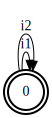

In [2]:
P = pn.epsilon_machine()
P.add_arc(0,pn.Arc(1,1,0,0)).add_arc(0,pn.Arc(2,2,0,0))
P.set_input_symbols(syms).set_output_symbols(syms)

## Model of the Desired Language $K$ 

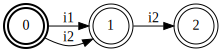

In [4]:
MK = pn.epsilon_machine()
MK.add_state()
MK.set_final(1)
MK.add_arc(0,pn.Arc(1,1,0,1)).add_arc(0,pn.Arc(2,2,0,1))
MK.add_state()
MK.set_final(2)
MK.add_arc(1,pn.Arc(2,2,0,2))
MK.set_input_symbols(syms).set_output_symbols(syms)

## Output Attacker $\mathcal{A}_O$

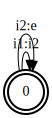

In [5]:
AO = pn.epsilon_machine()
AO.add_arc(0,pn.Arc(1,2,0,0)).add_arc(0,pn.Arc(2,0,0,0))
AO.set_input_symbols(syms).set_output_symbols(syms)

## Input Attacker $\mathcal{A}_{I}$

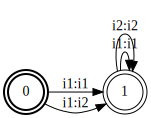

In [6]:
AI = pn.epsilon_machine()
AI.add_state()
AI.set_final(1)
AI.add_arc(0,pn.Arc(1,1,0,1)).add_arc(0,pn.Arc(1,2,0,1))
AI.add_arc(1,pn.Arc(1,1,0,1)).add_arc(1,pn.Arc(2,2,0,1))
AI.set_input_symbols(syms).set_output_symbols(syms)

## Supervisor $\mathcal{S}$
$$
\mathcal{S} = \mathcal{A}^{-1}_0 \circ \mathcal{M}_K \circ \mathcal{A}^{-1}_I
$$

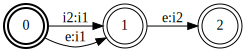

In [7]:
S = pn.compose(pn.compose(pn.invert(AO),MK),pn.invert(AI))
S.set_input_symbols(syms).set_output_symbols(syms)

## Output Language $L_O(\mathcal{A}_O \circ \mathcal{S} \circ \mathcal{A}_I)$

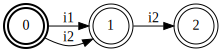

In [8]:
LO = pn.compose(pn.compose(AO,S),AI).project(project_output=True).optimize()
LO